## Neural Network Model

A neural network model (NNM) is a type of machine learning model that is loosely modeled after the structure and function of the human brain. It consists of a large number of interconnected processing nodes, or "neurons," that work together to process input data and make predictions or classifications. 

For this project, we utilised Keras, a high-level neural netowkrs API, written in Python. The basic building block of a Keras model is a layer. Layers are stacked together to form a neural network model, and each layer is responsible for performing a specific transformation on its inputs. The output of one layer becomes the input of the next layer until the final output layer produces the model’s predictions.

 We have used this model to predict bankruptcy and performed analysis based on the following steps:
1. Preparing data (obtain top 10 features, obtain train and test sets)
2. Training NNM on full dataset (all 95 features)
3. Training NNM with only top 10 features
4. Evaluating the performance of each model by generating ROC and AUC, and comparing the classification reports of each model


### 1. Preparing Data

##### a) Importing necessary libraries and load upsampled dataset

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import roc_curve, auc


In [14]:
# Load the data from CSV file
df = pd.read_csv("upsampled_bankruptcy.csv")


##### b) Splitting data into test and training sets (all 95 variables)

In [15]:
# Display new class counts
df["Bankrupt?"].value_counts()
X_upsample = df.drop("Bankrupt?", axis=1)
y_upsample = df["Bankrupt?"]

X_train_upsample, X_test_upsample, y_train_upsample, y_test_upsample = train_test_split(X_upsample, y_upsample, test_size=0.2,random_state=42)
y_upsample.value_counts()



0    6599
1    6599
Name: Bankrupt?, dtype: int64

##### c) Splitting data into test and training sets (top 10 variables)

In [16]:
# Split the data into training and testing sets for top 10 variables based on correlation with bankruptcy

corr_matrix = df.corr()
num_features = 10
corr_with_bankrupt = corr_matrix["Bankrupt?"].abs().sort_values(ascending=False)
top_corr_features = corr_with_bankrupt[1:num_features+1].index.tolist()
df_top10_upsampled = df[top_corr_features]
X_top10_upsample = df_top10_upsampled
y_top10_upsample = df["Bankrupt?"]
X_train_top10_upsample, X_test_top10_upsample, y_train_top10_upsample, y_test_top10_upsample = train_test_split(X_top10_upsample, y_top10_upsample, test_size=0.2,random_state=42)

### 2. Training NNM on full dataset

##### a) Building Neural network

Overall, this model architecture consists of three fully connected layers with ReLU activation functions, followed by BatchNormalization and Dropout layers to improve model performance and prevent overfitting, and a final output layer with a sigmoid activation function for binary classification.

In [17]:
# Build the neural network model


# model for upsampled data (All)

model_upsample_all = Sequential()
model_upsample_all.add(Dense(128, input_dim=X_train_upsample.shape[1], activation='relu'))
model_upsample_all.add(BatchNormalization())
model_upsample_all.add(Dense(64, activation='relu'))
model_upsample_all.add(Dropout(0.2))
model_upsample_all.add(Dense(32, activation='relu'))
model_upsample_all.add(Dense(1, activation='sigmoid'))
model_upsample_all.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##### b) Compiling the model 

model.compile is a function in Keras that compiles the model with the chosen loss function, optimizer, and metrics. 

In this case, the loss function chosen is binary_crossentropy, which is commonly used for binary classification problems. The optimizer chosen is adam, which is a commonly used optimization algorithm for neural networks. Finally, metrics is set to accuracy, which will be used to evaluate the performance of the model during training and testing.

In [18]:

# compile the model for all variables with upsampled dataset

model_upsample_all.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


##### c) Training the neural network model

Overall, this line of code is training the neural network model on the upsampled training data, using mini-batch stochastic gradient descent with a batch size of 32 and the binary crossentropy loss function. The model is evaluated on the validation data after each epoch.

In [19]:
# Train the model for all the variables with the upsampled dataset

model_upsample_all.fit(X_train_upsample, y_train_upsample, epochs=50, batch_size=32, validation_data=(X_test_upsample, y_test_upsample))


Epoch 1/50
330/330 [==============================] - 1s 1ms/step - loss: 0.5842 - accuracy: 0.6892 - val_loss: 0.4836 - val_accuracy: 0.7667
Epoch 2/50
330/330 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.7741 - val_loss: 0.3972 - val_accuracy: 0.8121
Epoch 3/50
330/330 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8001 - val_loss: 0.3771 - val_accuracy: 0.8432
Epoch 4/50
330/330 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8171 - val_loss: 0.3476 - val_accuracy: 0.8633
Epoch 5/50
330/330 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8278 - val_loss: 0.3426 - val_accuracy: 0.8655
Epoch 6/50
330/330 [==============================] - 0s 1ms/step - loss: 0.3657 - accuracy: 0.8411 - val_loss: 0.2988 - val_accuracy: 0.8841
Epoch 7/50
330/330 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8445 - val_loss: 0.3010 - val_accuracy: 0.8792
Epoch 

### 3. Training NNM on top 10 variables

In [21]:
# model for upsampled data (Top 10)

model_upsample_top10 = Sequential()
model_upsample_top10.add(Dense(128, input_dim=X_train_top10_upsample.shape[1], activation='relu'))
model_upsample_top10.add(BatchNormalization())
model_upsample_top10.add(Dense(64, activation='relu'))
model_upsample_top10.add(Dropout(0.2))
model_upsample_top10.add(Dense(32, activation='relu'))
model_upsample_top10.add(Dense(1, activation='sigmoid'))
model_upsample_top10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# compile the model for top 10 variables with upsampled dataset

model_upsample_top10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model for top 10 variables with the upsampled dataset

model_upsample_top10.fit(X_train_top10_upsample, y_train_top10_upsample, epochs=50, batch_size=32, validation_data=(X_test_top10_upsample, y_test_top10_upsample))



Epoch 1/50
330/330 [==============================] - 1s 1ms/step - loss: 0.3682 - accuracy: 0.8437 - val_loss: 0.4683 - val_accuracy: 0.8352
Epoch 2/50
330/330 [==============================] - 0s 954us/step - loss: 0.3525 - accuracy: 0.8485 - val_loss: 0.3711 - val_accuracy: 0.8439
Epoch 3/50
330/330 [==============================] - 0s 996us/step - loss: 0.3521 - accuracy: 0.8504 - val_loss: 0.6300 - val_accuracy: 0.7140
Epoch 4/50
330/330 [==============================] - 0s 959us/step - loss: 0.3453 - accuracy: 0.8518 - val_loss: 0.3175 - val_accuracy: 0.8716
Epoch 5/50
330/330 [==============================] - 0s 962us/step - loss: 0.3451 - accuracy: 0.8515 - val_loss: 0.5298 - val_accuracy: 0.7386
Epoch 6/50
330/330 [==============================] - 0s 941us/step - loss: 0.3387 - accuracy: 0.8573 - val_loss: 0.4433 - val_accuracy: 0.7409
Epoch 7/50
330/330 [==============================] - 0s 947us/step - loss: 0.3389 - accuracy: 0.8559 - val_loss: 0.4365 - val_accuracy: 0

### 4. Evaluating Performance of both Models


##### a) Accuracy of our NNMs

In [20]:

#Accuracy for upsampled dataset for all the variables and optimised model
loss_upsample_all, accuracy_upsample_all = model_upsample_all.evaluate(X_test_upsample, y_test_upsample)

print("Accuracy for upsampled dataset with all variables:", accuracy_upsample_all)


#Accuracy for upsampled dataset for top 10 variables and optimised model
loss_upsample_top10, accuracy_upsample_top10 = model_upsample_top10.evaluate(X_test_top10_upsample, y_test_top10_upsample)

print("Accuracy for upsampled dataset with top 10 variables:", accuracy_upsample_top10)

83/83 [==============================] - 0s 481us/step - loss: 0.1675 - accuracy: 0.9341
Accuracy for upsampled dataset with all variables: 0.9340909123420715


##### b) Plotting the ROC, AUC and its associated classification report for the NN model (full dataset)

83/83 [==============================] - 0s 450us/step


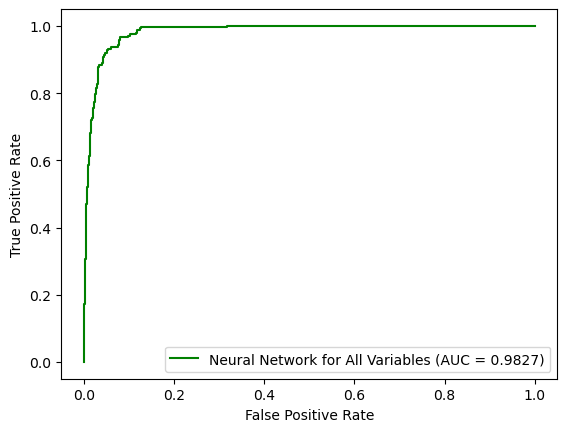

83/83 [==============================] - 0s 397us/step
              precision    recall  f1-score   support

           0     0.9683    0.8983    0.9320      1328
           1     0.9041    0.9703    0.9360      1312

    accuracy                         0.9341      2640
   macro avg     0.9362    0.9343    0.9340      2640
weighted avg     0.9364    0.9341    0.9340      2640

83/83 [==============================] - 0s 461us/step - loss: 0.1675 - accuracy: 0.9341
Test accuracy: 0.9340909123420715


In [22]:


# predict probabilities with neural network model for all variables
nn_probs = model_upsample_all.predict(X_test_upsample)
# compare the predicted probabilities
fpr_nn, tpr_nn, _ = roc_curve(y_test_upsample, nn_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)
plt.plot(fpr_nn, tpr_nn, color='green', label='Neural Network for All Variables (AUC = %0.4f)' % roc_auc_nn)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Predict on test data
y_pred = model_upsample_all.predict(X_test_upsample)

# Convert predicted probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test_upsample, y_pred, digits = 4))

loss, accuracy = model_upsample_all.evaluate(X_test_upsample, y_test_upsample)
print('Test accuracy:', accuracy)



##### b) Plotting the ROC, AUC and its associated classification report for the NN model (top 10 variables)

83/83 [==============================] - 0s 455us/step


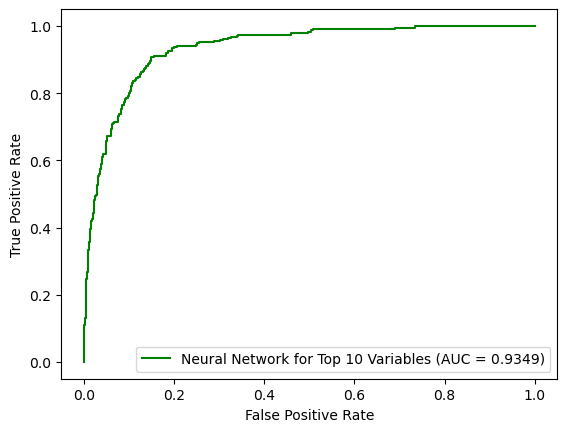

83/83 [==============================] - 0s 437us/step
              precision    recall  f1-score   support

           0     0.9377    0.7485    0.8325      1328
           1     0.7886    0.9497    0.8617      1312

    accuracy                         0.8485      2640
   macro avg     0.8632    0.8491    0.8471      2640
weighted avg     0.8636    0.8485    0.8470      2640

83/83 [==============================] - 0s 458us/step - loss: 0.3557 - accuracy: 0.8485
Test accuracy: 0.8484848737716675


In [23]:
# predict probabilities with neural network model for top 10 variables
nn_probs_top10 = model_upsample_top10.predict(X_test_top10_upsample)
# compare the predicted probabilities
fpr_nn_top10, tpr_nn_top10, _ = roc_curve(y_test_top10_upsample, nn_probs_top10)
roc_auc_nn_top10 = auc(fpr_nn_top10, tpr_nn_top10)
plt.plot(fpr_nn_top10, tpr_nn_top10, color='green', label='Neural Network for Top 10 Variables (AUC = %0.4f)' % roc_auc_nn_top10)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Predict on test data
y_pred = model_upsample_top10.predict(X_test_top10_upsample)

# Convert predicted probabilities to class labels
y_pred = (y_pred > 0.5).astype(int)

# Generate classification report
print(classification_report(y_test_top10_upsample, y_pred, digits = 4))

loss, accuracy = model_upsample_top10.evaluate(X_test_top10_upsample, y_test_top10_upsample)
print('Test accuracy:', accuracy)


